In [4]:
import mysql.connector
from mysql.connector import errorcode
import config
db_name= 'Movie Project1'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = db_name
    
)
cursor = cnx.cursor()
print(cnx)

In [31]:
def mysql(query):    
    cursor.execute(query)
    result = cursor.fetchall()

    return result # returns tuples without headers

genres = mysql("SELECT genre, ROUND(AVG(boxoffice-budget), 0) AS avg_return FROM Genres GROUP BY genre ORDER BY avg_return DESC;")
genres

[('3D', 29556315.0),
 ('Animation', 29031991.0),
 ('Rom-Com', 20827509.0),
 ('Horror', 17412297.0),
 ('Gay/Lesbian', 9612395.0)]

In [91]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

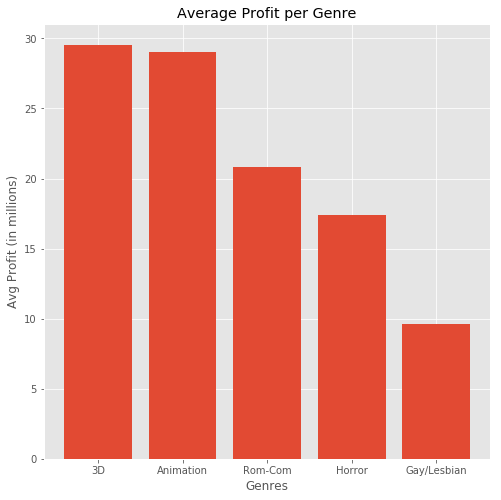

In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

xs = [i[0] for i in genres]
ys = [i[1]/1000000 for i in genres]

plt.figure(figsize=(8,8))
plt.bar(xs, ys)
plt.xlabel('Genres')
plt.ylabel('Avg Profit (in millions)')
plt.title('Average Profit per Genre')
plt.show()

In [73]:
_3d = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='3D' ORDER BY returns;")
_ani = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Animation' ORDER BY returns;")
_hor = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Horror' ORDER BY returns;")
_rc = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Rom-Com' ORDER BY returns;")
_gl = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Gay/Lesbian' ORDER BY returns;")




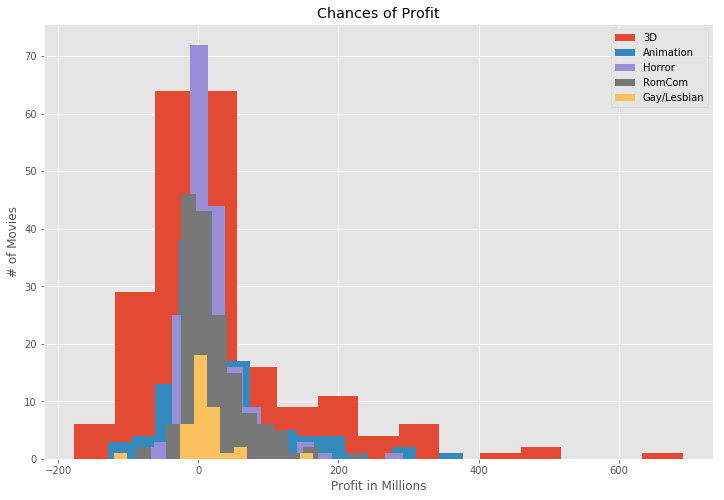

In [75]:
fig, ax = plt.subplots(figsize=(12,8))


ax.hist([i[1]/1000000 for i in _3d], bins=15, label='3D')
ax.hist([i[1]/1000000 for i in _ani], bins=15, label="Animation")
ax.hist([i[1]/1000000 for i in _hor], bins=15, label="Horror")
ax.hist([i[1]/1000000 for i in _rc], bins=15, label="RomCom")
ax.hist([i[1]/1000000 for i in _gl], bins=15, label="Gay/Lesbian")
ax.legend()
ax.set_title('Chances of Profit')
ax.set_ylabel('# of Movies')
ax.set_xlabel("Profit in Millions")
plt.show()

[('Gay/Lesbian', 73.0), ('Horror', 58.0), ('Rom-Com', 3.0), ('Animation', 2.0), ('3D', 1.0)]


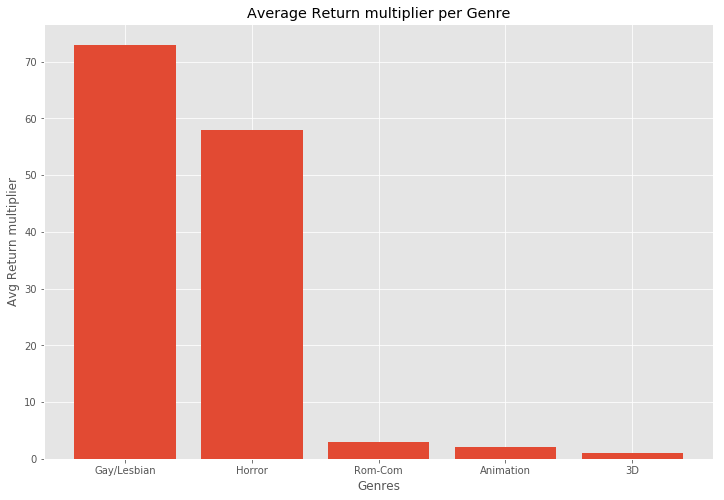

In [90]:
avg_pct_r = mysql("SELECT genre, ROUND(AVG(boxoffice/budget), 0) AS avg_return FROM Genres GROUP BY genre ORDER BY avg_return DESC;")

print(avg_pct_r)
xs = [i[0] for i in avg_pct_r]
ys = [i[1] for i in avg_pct_r]

plt.figure(figsize=(12,8))
plt.bar(xs, ys)
plt.xlabel('Genres')
plt.ylabel('Avg Return multiplier')
plt.title('Average Return multiplier per Genre')
plt.show()
